## Prepare Data

In [1]:
# Import our dependencies
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#read the csv
ML_Data= pd.read_csv('Data/Five_Year_Data.csv')
ML_Data.head()

,GEO_ID,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,...,Total Population,White,Black,American Indian,Asian,Pacific Islander,Hispanic/Latino,County,State,Year
0,0500000US01001,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,24124.0,...,55200,76.9,19.1,0.3,1.0,0.1,2.8,Autauga County,Alabama,2018
1,0500000US01003,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,93379.0,...,208107,86.3,9.5,0.7,0.8,0.0,4.5,Baldwin County,Alabama,2018
2,0500000US01005,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,8720.0,...,25782,47.4,47.6,0.3,0.4,0.0,4.3,Barbour County,Alabama,2018
3,0500000US01007,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,8099.0,...,22527,76.7,22.3,0.0,0.2,0.0,2.4,Bibb County,Alabama,2018
4,0500000US01009,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,21346.0,...,57645,95.5,1.5,0.2,0.3,0.0,9.1,Blount County,Alabama,2018


In [3]:
ML_Data.columns

Index(['GEO_ID', 'Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', 'Associate's_degree', 'Bachelor's_degree',
       'Graduate_degree', 'Population (16+)', 'Employed',
       'Median Household Income', 'Per capita Income', 'Unemployment Rate',
       'Professional (Occupation)', 'Service (Occupation)',
       'Sales (Occupation)', 'Construction (Occupation)',
       'Production (Occupation)', 'Salary (Class)', 'Gov't (Class)',
       'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       'Child-poverty', 'Median Home value', 'Median Mortgage', 'Median Rent',
       'Total Population', 'White', 'Black', 'American Indian', 'Asian',
       'Pacific Islander', 'Hispanic/Latino', 'County', 'State', 'Year'],
      dtype='object')

In [4]:
#Poverty Rate model data
#removed year, county, and state
Poverty_data= ML_Data[['Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', "Associate's_degree", "Bachelor's_degree",
       'Graduate_degree', 'Population (16+)', 'Employed',
       'Median Household Income', 'Per capita Income', 'Unemployment Rate',
       'Professional (Occupation)', 'Service (Occupation)',
       'Sales (Occupation)', 'Construction (Occupation)',
       'Production (Occupation)', 'Salary (Class)', "Gov't (Class)",
       'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       'Child-poverty', 'Median Home value', 'Median Mortgage', 'Median Rent',
       'Total Population', 'White', 'Black', 'American Indian', 'Asian',
       'Pacific Islander', 'Hispanic/Latino']]
Poverty_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,Median Household Income,...,Median Home value,Median Mortgage,Median Rent,Total Population,White,Black,American Indian,Asian,Pacific Islander,Hispanic/Latino
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,24124.0,58786.0,...,147900.0,1176.0,966.0,55200,76.9,19.1,0.3,1.0,0.1,2.8
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,93379.0,55962.0,...,189800.0,1359.0,958.0,208107,86.3,9.5,0.7,0.8,0.0,4.5
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,8720.0,34186.0,...,92900.0,950.0,590.0,25782,47.4,47.6,0.3,0.4,0.0,4.3
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,8099.0,45340.0,...,96500.0,1093.0,714.0,22527,76.7,22.3,0.0,0.2,0.0,2.4
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,21346.0,48695.0,...,124700.0,1100.0,662.0,57645,95.5,1.5,0.2,0.3,0.0,9.1


## Data Exploration and Analysis

In [5]:
# Calculate the correlation matrix
#https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
#chatgpt for aid on plotting
# correlation = Unemployment_data.corr()

# # Plotting the heatmap
# plt.figure(figsize=(12, 8))
# sb.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()


# One Hot Encoder - Only run if there is categorical data

In [6]:
Unemployment_data.dtypes

NameError: name 'Unemployment_data' is not defined

In [ ]:
# Generate our categorical variable lists. #checks for all cetegories that are objects
state_cat = Unemployment_data.dtypes[Unemployment_data.dtypes == "object"].index.tolist()

In [ ]:
# Check the number of unique values in each column
Unemployment_data[state_cat].nunique()

Series([], dtype: float64)

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Unemployment_data[state_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(state_cat)
encode_df.head()

""
0
1
2
3
4


In [ ]:
# Merge one-hot encoded features and drop the originals
Unemployment_data=Unemployment_data.merge(encode_df,left_index=True, right_index=True)
Unemployment_data= Unemployment_data.drop(state_cat, axis=1)
Unemployment_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Unemployment Rate,Year
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,4.2,2018
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,4.4,2018
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,9.5,2018
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,7.5,2018
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,4.1,2018


# Random Forest Model

In [7]:
# Split target column and Features Columns
y = Poverty_data['Poverty']
X = Poverty_data.drop(columns='Poverty')

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create scaler instance
scaler = StandardScaler()
# Fit the Standardscaler with training data
scaler.fit(X_train)
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Fitting the Random Forest Model

In [10]:
# Create the random forest Regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [11]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

- Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [13]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = rf_model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


The score is -3.312139098624252.
The r2 is 0.930385188424598.
The mean squared error is 2.7004216645477768.
The root mean squared error is 1.6432959759421846.
The standard deviation is 6.220438667941329.


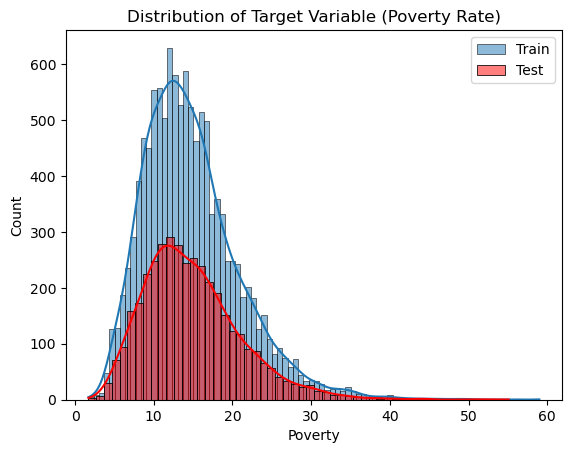

In [14]:
# Visualize the distribution of the target variable
sb.histplot(y_train, kde=True, label='Train')
sb.histplot(y_test, kde=True, label='Test', color='red')
plt.legend()
plt.title('Distribution of Target Variable (Poverty Rate)')
plt.show()


In [15]:
Poverty_data['Poverty_log'] = np.log1p(Poverty_data['Poverty'])  # log1p to avoid log(0)

/var/folders/p1/sd0bq34d5xx6bcr_yjx4qcc40000gn/T/ipykernel_21520/513664454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Poverty_data['Poverty_log'] = np.log1p(Poverty_data['Poverty'])  # log1p to avoid log(0)


## Multiple tries - external aid

Chatgpt aid

In [17]:
# Separate features and target variable
X2 = Poverty_data.drop(columns=['Poverty', 'Poverty_log'])
y2 = Poverty_data['Poverty_log']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on test data
y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # inverse log transformation

# Inverse transform test target
y_test_original = np.expm1(y_test)

/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
207 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_param

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test_original, y_pred)

print("Best Parameters:", best_params)
print("Best Model - MSE:", mse)
print("Best Model - RMSE:", rmse)
print("Best Model - R^2 Score:", r2)


Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model - MSE: 2.5826966840427352
Best Model - RMSE: 1.6070770622601567
Best Model - R^2 Score: 0.9316609058828905


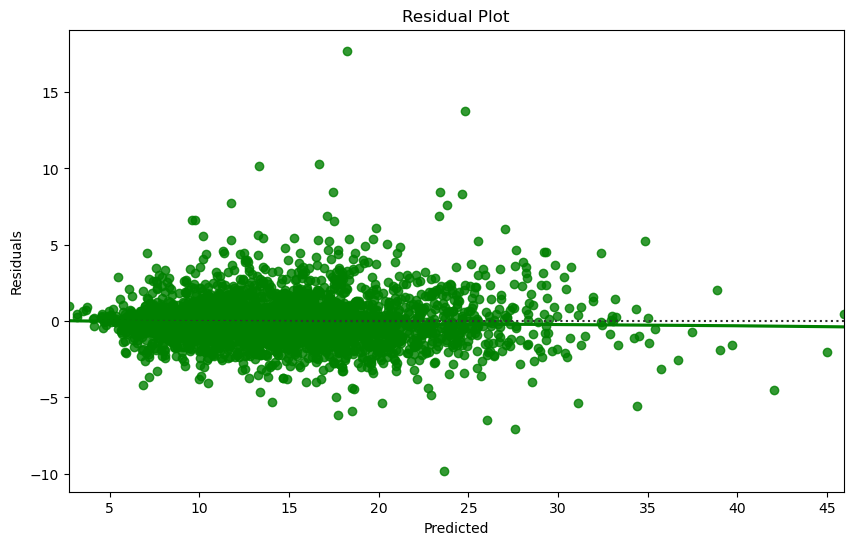

In [22]:
# Residual Plot
residuals = y_test_original - y_pred

plt.figure(figsize=(10, 6))
sb.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

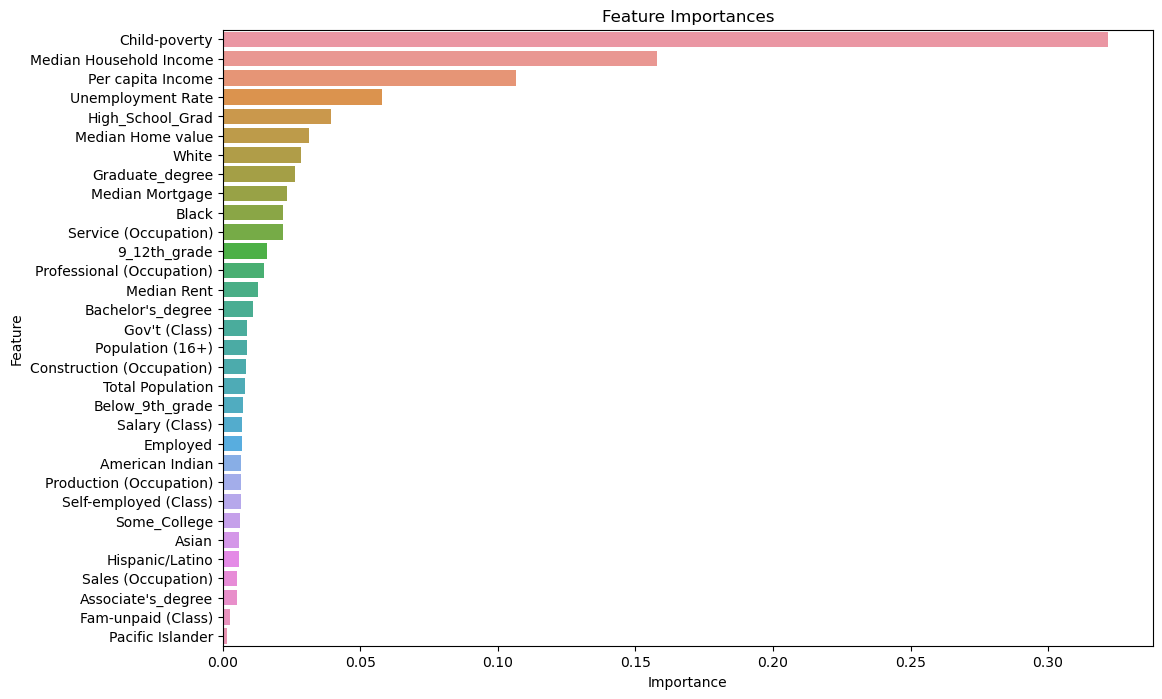

In [23]:
# Feature Importance
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sb.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

High correlations between features can indicate multicollinearity, which can be problematic for some models but is generally less of a concern for Random Forest models. However, removing highly correlated features can simplify your model and potentially improve performance.

exclude it to avoid redundancy. Multicollinearity